In [6]:
#Kutuphane indirmeleri
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [32]:
#BIST100 SASA degerleri
data= pd.read_csv('/content/drive/MyDrive/Utk_yuzler/sasa.csv')
#veri goster
data

,Date,Open,High,Low,Close,Volume
0,1/2/2012 18:10:00,0.07,0.07,0.07,0.07,898015
1,1/3/2012 18:10:00,0.07,0.07,0.07,0.07,2536203
2,1/4/2012 18:10:00,0.07,0.07,0.07,0.07,1998267
3,1/5/2012 18:10:00,0.07,0.07,0.07,0.07,3220992
4,1/6/2012 18:10:00,0.07,0.07,0.07,0.07,3054863
...,...,...,...,...,...,...
3091,5/10/2024 18:10:00,45.72,46.34,44.68,44.70,44451230
3092,5/13/2024 18:10:00,44.74,45.68,44.64,45.02,52791489
3093,5/14/2024 18:10:00,44.96,48.10,44.82,47.34,87707176
3094,5/15/2024 18:10:00,47.20,48.66,46.60,46.90,66184457


<Axes: >

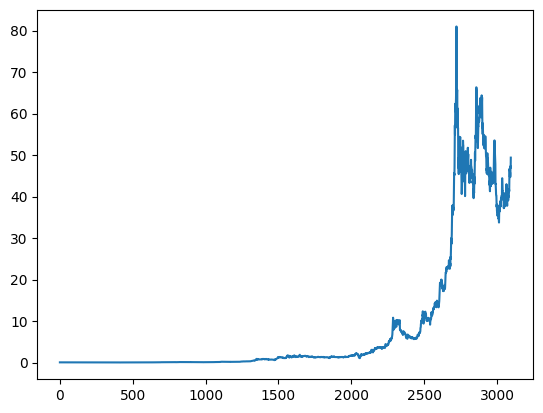

In [33]:
# Veri Gorsellestirme
data['Close'].plot()

In [34]:
#verileri dataya bolmek
train_data = data.iloc[:int(len(data)*.99)]
test_data = data.iloc[int(len(data)*.99):]

In [35]:
#gelecek degisken hedefler
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [36]:
#Takip modeli olusturma
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
#Data tahmini olusturma
predictions = model.predict(test_data[features])
print('model predictions:')
print(predictions)

model predictions:
[42.45018  42.87423  42.08715  39.14467  38.08317  38.079807 39.107
 39.795025 41.593334 41.061905 40.049732 40.040817 39.656906 39.32254
 40.004562 39.04658  39.668957 39.623783 41.01426  41.18655  44.456726
 44.371655 45.825996 45.662132 45.329094 45.57265  45.70089  44.5571
 47.056686 47.214527 48.24672 ]


In [38]:
#Guncel degerleri goster
print('actual values:')
print(test_data[target])

actual values:
3065    43.00
3066    42.78
3067    40.50
3068    38.50
3069    38.44
3070    37.80
3071    39.66
3072    40.38
3073    41.40
3074    41.40
3075    40.78
3076    39.88
3077    39.08
3078    39.62
3079    40.00
3080    40.14
3081    39.96
3082    40.90
3083    41.72
3084    41.28
3085    44.48
3086    46.70
3087    46.20
3088    46.12
3089    44.72
3090    45.84
3091    44.70
3092    45.02
3093    47.34
3094    46.90
3095    49.40
Name: Close, dtype: float64


In [39]:
#Model dogrulugunu goster
accuracy = model.score(test_data[features], test_data[target])
print('model accuracy:')
print(accuracy)

model accuracy:
0.9398516352101939


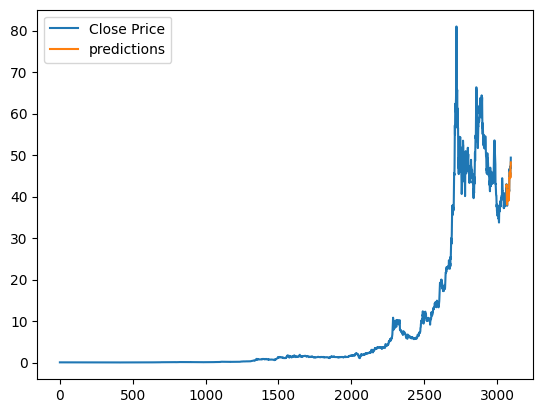

In [40]:
#Tahmini ve kapanıs fiyatını cizimi
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'predictions')
plt.legend()
plt.show()
